In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import pandas as pd
# %matplotlib notebook

# import data

In [53]:
SizeList = [8, 16, 32, 64, 128]

def MagPath(size):
    path = '.\\data\\avg\\mag\\L'+str(size)+'\\'
    return path
def SusPath(size):
    path = '.\\data\\avg\\sus\\L'+str(size)+'\\'
    return path

M = [[] for i in range(5)]
M_err = [[] for i in range(5)]

Sus = [[] for i in range(5)]
Sus_err = [[] for i in range(5)]

df =pd.read_csv(MagPath(8)+'avg_mag.dat',
                sep = ';',
               names = ['T', 'mag', 'err'])

for L in SizeList:
    idx = SizeList.index(L)
    df1 = pd.read_csv(MagPath(L)+'avg_mag.dat',
                     sep = ';',
                     names = ['T', 'mag', 'err'])
    
    df2 = pd.read_csv(SusPath(L)+'avg_sus.dat',
                     sep = ';',
                     names = ['T', 'sus', 'err'])
    M[idx] = df1['mag'].tolist()
    M_err[idx] = df1['err'].tolist()
    Sus[idx] = df2['sus'].tolist()
    Sus_err[idx] = df2['err'].tolist()
    
T = df1['T'].tolist()

# Plot the basic results

In [54]:
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font',family='Times New Roman')
plt.rcParams['axes.linewidth']=2
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.width']=2
plt.rcParams['xtick.minor.width']=2
plt.rcParams['ytick.minor.width']=2
markers=['^', 'D', 'o','s', 'v']
colors=['darkorange', 'mediumseagreen', 'mediumorchid', 'cornflowerblue', 'hotpink']
label = [r'$L=8$', r'$L=16$', r'$L=32$', r'$L=64$', r'$L=128$']

C:\Users\Daniel Han Kim\Anaconda3\envs\complexity\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


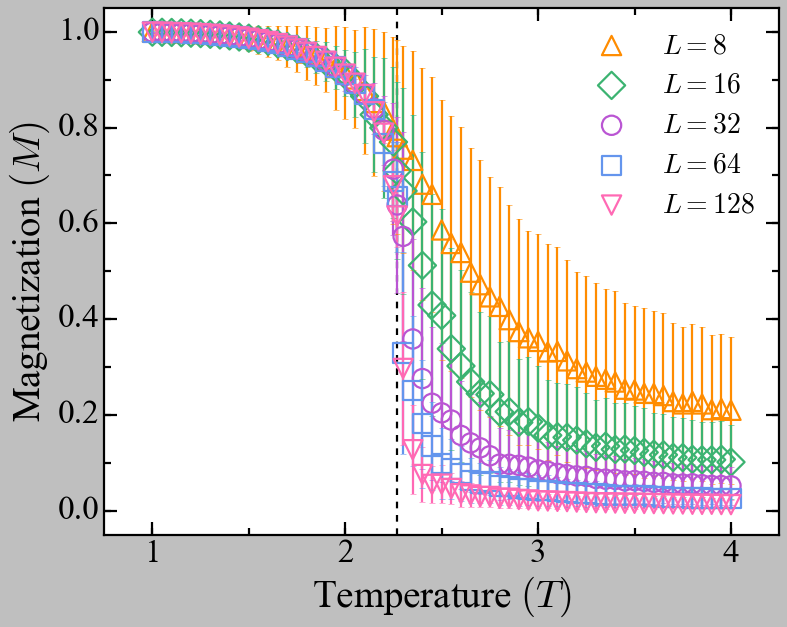

In [55]:
fig, ax = plt.subplots(tight_layout = True)

for i in range(5):
    ax.scatter(T, M[i], s = 300, marker = markers[i], facecolor = 'none',
              edgecolor = colors[i], linewidth = 2.0, label = label[i], zorder = 3)
    plt.errorbar(T, M[i], yerr = M_err[i], color = colors[i], fmt = 'none',
                mfc = 'white', elinewidth = 2., zorder = 2)

ax.set_xlabel('Temperature $(T)$', fontsize=35)
ax.set_ylabel('Magnetization $(M)$', fontsize=35)
ax.legend(scatterpoints = 1, frameon = False, fontsize = 25, loc = 'upper right')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)
ax.xaxis.set_major_locator(MultipleLocator(1.))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.axvline(x = 2.269185, c = 'k', ls = '--', lw = '2.', label = r'$T_c$', zorder = 1)
ax.set_xlim(0.75, 4.25)
ax.set_ylim(-0.05, 1.05)
plt.show()
# plt.savefig('./figs/mag.png', format = 'png')

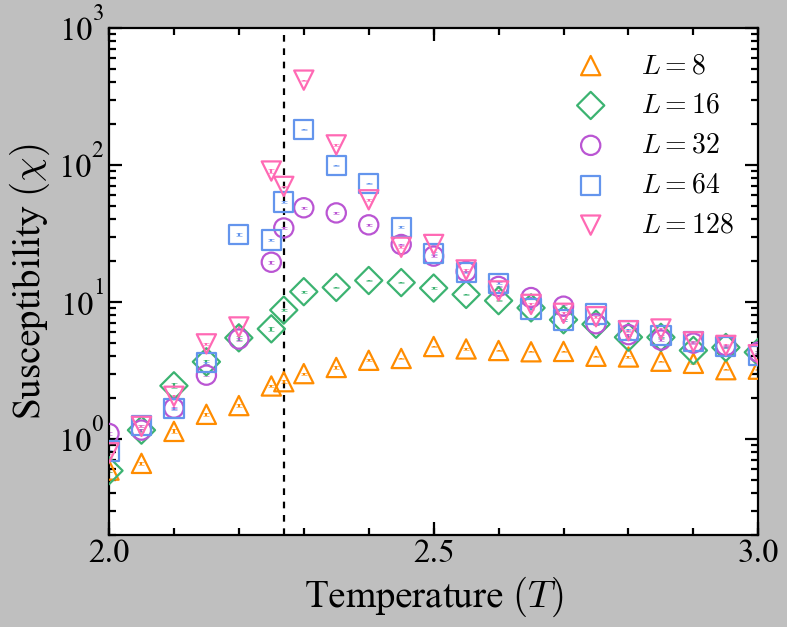

In [68]:
fig, ax = plt.subplots(tight_layout = True)

for i in range(5):
    ax.scatter(T, Sus[i], s = 300, marker = markers[i], facecolor = 'none',
              edgecolor = colors[i], linewidth = 2.0, label = label[i], zorder = 3)
    plt.errorbar(T, Sus[i], yerr = Sus_err[i], color = colors[i], fmt = 'none',
                mfc = 'white', elinewidth = 2., zorder = 2)
        
ax.set_xlabel('Temperature $(T)$', fontsize=35)
ax.set_ylabel(r'Susceptibility $(\chi)$', fontsize=35)
ax.legend(scatterpoints = 1, frameon = False, fontsize = 25, loc = 'upper right')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.yaxis.set_major_locator(MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.axvline(x = 2.269185, c = 'k', ls = '--', lw = '2.', label = r'$T_c$', zorder = 1)
# ax.set_xlim(0.75, 4.25)
ax.set_xlim(2, 3)
ax.set_yscale('log')
ax.set_ylim(0.2, 1000)
plt.show()
plt.savefig('./figs/sus.png', format = 'png')

# FSS analysis: When we know $T_c$

## measure the exponents

In [69]:
from scipy.optimize import curve_fit

def FitFunc1(x, a, b):
    return a*x + b


In [70]:
Tc = 2.269185
cidx = T.index(Tc)

M1 = [ M[i][cidx] for i in range(5)]
M1_err = [ M_err[i][cidx] for i in range(5)]

Sus1 = [ Sus[i][cidx] for i in range(5)]
Sus1_err = [ Sus_err[i][cidx] for i in range(5)]


log_L = [np.log(x) for x in SizeList]
log_M1 = [np.log(x) for x in M1]
log_Sus1 = [np.log(x) for x in Sus1]

In [71]:
popt1, pcov1 = curve_fit(FitFunc1, log_L, log_M1)
print(popt1)
exp_err = np.sqrt(np.diag(pcov1))
print(exp_err)

Beta_Nu = abs(popt1[0])

[-0.08017287 -0.11150373]
[0.0192098  0.06918789]
[-0.07297288 -0.09854384]


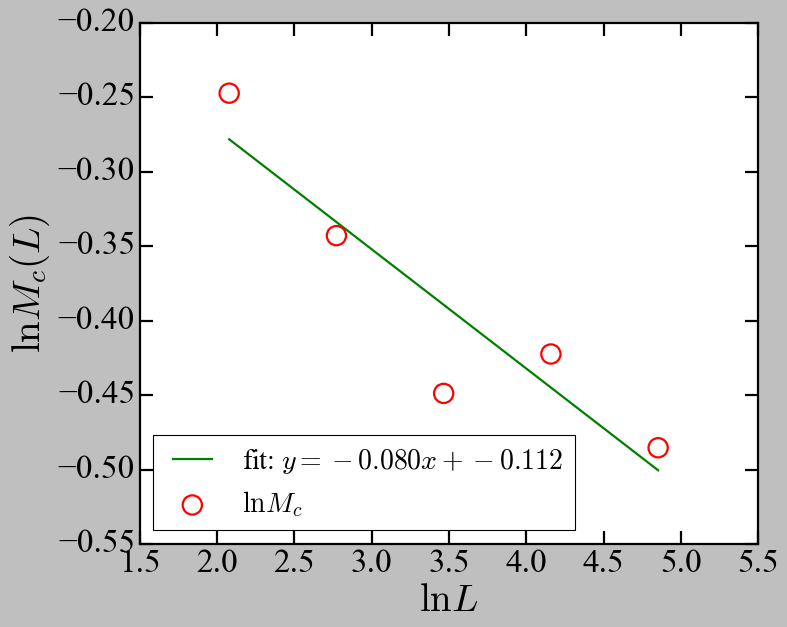

<Figure size 800x640 with 0 Axes>

In [72]:
FitLabel = [r'fit: $y = %.3f x + %.3f$' %tuple(popt1), r'$\ln M_c$', ]

fig, ax = plt.subplots(tight_layout = True)
cont_L = np.linspace(SizeList[0], SizeList[-1], 1000)
log_cont_L = np.linspace(np.log(SizeList[0]), np.log(SizeList[-1]), 1000)

ax.scatter(log_L, log_M1, s = 300, marker = 'o', facecolor = 'none',
          edgecolor = 'r', linewidth = 2.0, zorder = 3)
# plt.errorbar(log_L, log_M1, yerr = M1_err, color = 'r', fmt = 'none',
#                 mfc = 'white', elinewidth = 2., zorder = 2)

ax.plot(log_cont_L, FitFunc1(log_cont_L, *popt1), 'g-', lw= 2.)

# ax.plot(log_cont_L, FitFunc1(log_cont_L, -0.125, -0.0), 'b--', lw= 2.)
    
ax.set_xlabel(r'$\ln L$', fontsize=35)
ax.set_ylabel(r'$\ln M_c(L)$', fontsize=35)
ax.legend(FitLabel, scatterpoints = 1, frameon = True, 
          fontsize = 25, loc = 'lower left')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)
plt.show()
plt.savefig('./figs/mag_exp.png', format = 'png')

In [73]:
popt1, pcov1 = curve_fit(FitFunc1, log_L, log_Sus1)
print(popt1)
exp_err = np.sqrt(np.diag(pcov1))
print(exp_err)


Gamma_Nu = abs(popt1[0])

[ 1.20884927 -1.21009613]
[0.2096624  0.75514074]
[0.88109795 3.87023074]


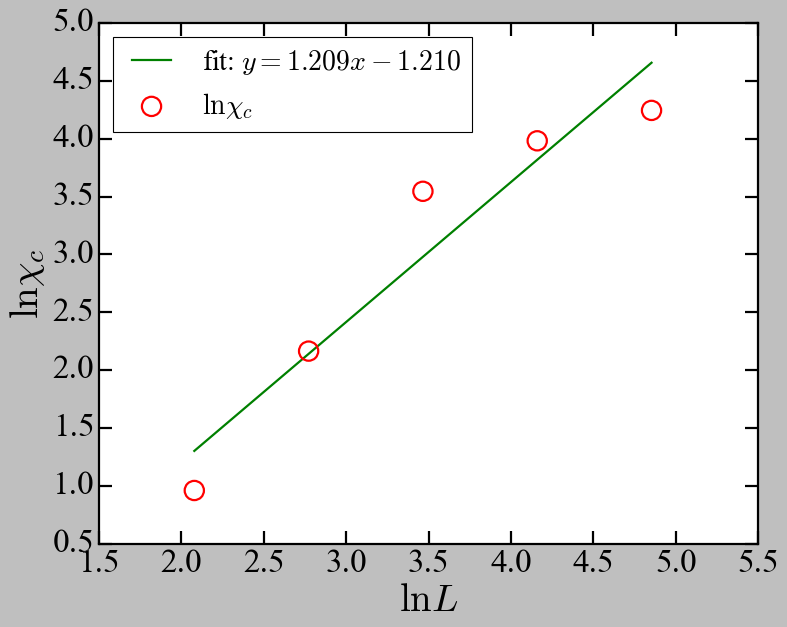

<Figure size 800x640 with 0 Axes>

In [74]:
FitLabel = [r'fit: $y = %.3f x %.3f$' %tuple(popt1), r'$\ln \chi_c$', ]

fig, ax = plt.subplots(tight_layout = True)
cont_L = np.linspace(SizeList[0], SizeList[-1], 1000)
log_cont_L = np.linspace(np.log(SizeList[0]), np.log(SizeList[-1]), 1000)

ax.scatter(log_L, log_Sus1, s = 300, marker = 'o', facecolor = 'none',
          edgecolor = 'r', linewidth = 2.0, zorder = 3)

ax.plot(log_cont_L, FitFunc1(log_cont_L, *popt1), 'g-', lw= 2.)

# plt.errorbar(log_L, log_Sus1, yerr = M1_err, color = 'r', fmt = 'none',
#                 mfc = 'white', elinewidth = 2., zorder = 2)
    
ax.set_xlabel(r'$\ln L$', fontsize=35)
ax.set_ylabel(r'$\ln \chi_c$', fontsize=35)
ax.legend(FitLabel, scatterpoints = 1, frameon = True, 
          fontsize = 25, loc = 'upper left')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)
plt.show()
plt.savefig('./figs/sus_exp.png', format = 'png')

## Data Collapse

In [75]:
def ScaleTemp(T, Tc, L, nu):
    RT_List = [(t-Tc)/Tc for t in T]
    x = [RT*np.power(L, 1/nu) for RT in RT_List]
    return x

def ScaleVals(ary, L, exp):
    y = [x*np.power(L, exp) for x in ary]
    return y

In [76]:
Scaled_T = []
Scaled_M = []
Scaled_Chi = []
abs_T = []
Tc = 2.269185
for L in SizeList:
    idx = SizeList.index(L)
    Scaled_T.append(ScaleTemp(T, Tc, L, 1))
#     Scaled_M.append(ScaleVals(M[idx], L, 0.125))
#     Scaled_Chi.append(ScaleVals(Sus[idx], L, -1.75))
    Scaled_M.append(ScaleVals(M[idx], L, Beta_Nu))
    Scaled_Chi.append(ScaleVals(Sus[idx], L, -Gamma_Nu))
    abs_T.append([abs(t) for t in Scaled_T[idx]])

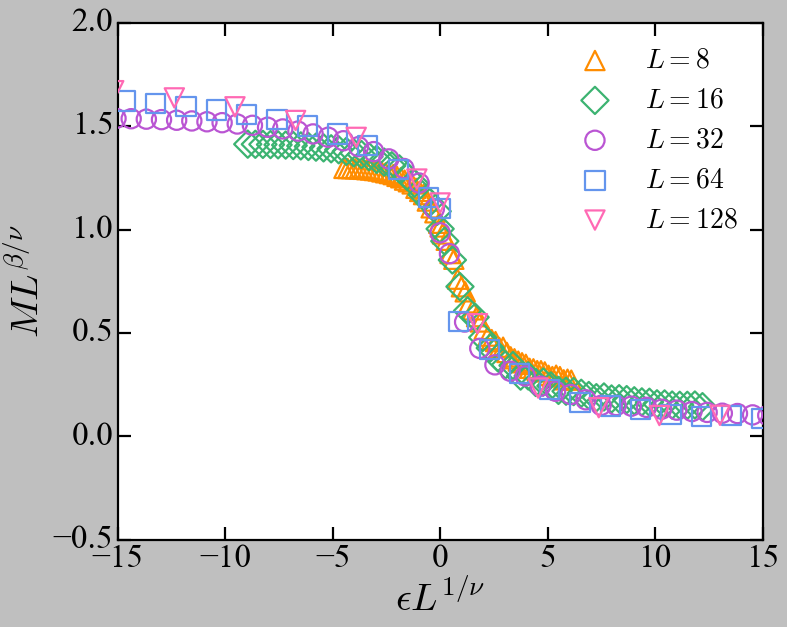

In [82]:
fig, ax = plt.subplots(tight_layout = True)


for i in range(5):
    ax.scatter(Scaled_T[i], Scaled_M[i], s = 300, marker = markers[i], facecolor = 'none',
              edgecolor = colors[i], linewidth = 2.0, label = label[i], zorder = 3)
    
ax.set_xlabel(r'$\epsilon L^{1/\nu}$', fontsize=35)
ax.set_ylabel(r'$ML^{\beta/\nu}$', fontsize=35)
ax.legend(scatterpoints = 1, frameon = False, fontsize = 25, loc = 'upper right')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)

ax.set_xlim(-15, 15)
plt.show()

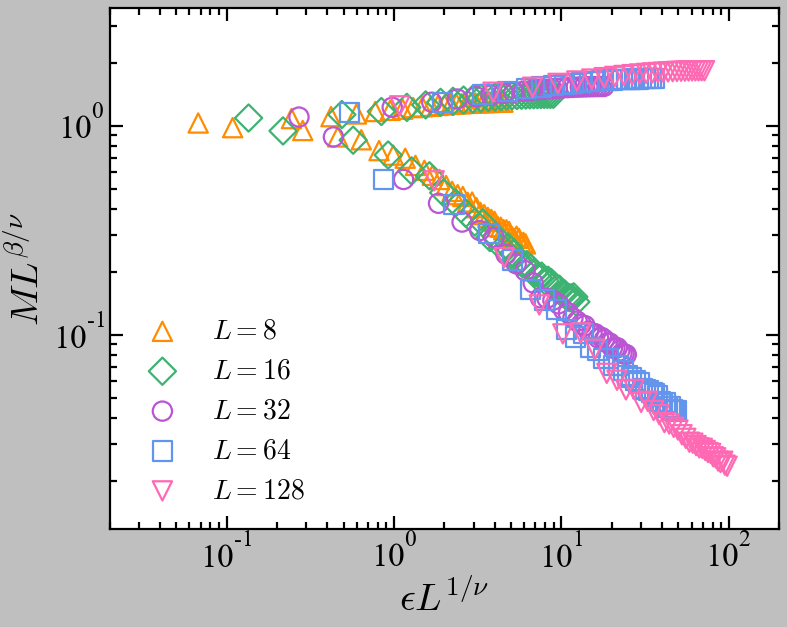

<Figure size 800x640 with 0 Axes>

In [79]:
fig, ax = plt.subplots(tight_layout = True)

for i in range(5):
    ax.scatter(abs_T[i], Scaled_M[i], s = 300, marker = markers[i], facecolor = 'none',
              edgecolor = colors[i], linewidth = 2.0, label = label[i], zorder = 3)
    
ax.set_xlabel(r'$\epsilon L^{1/\nu}$', fontsize=35)
ax.set_ylabel(r'$ML^{\beta/\nu}$', fontsize=35)
ax.legend(scatterpoints = 1, frameon = False, fontsize = 25, loc = 'lower left')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)

ax.set_xlim(2*10**-2, 2*10**2)
ax.set_ylim(min(Scaled_M[-1])/2, max(Scaled_M[-1])*2)
ax.loglog()
plt.show()
plt.savefig('./figs/mag_collapse.png', format = 'png')

ValueError: x and y must be the same size

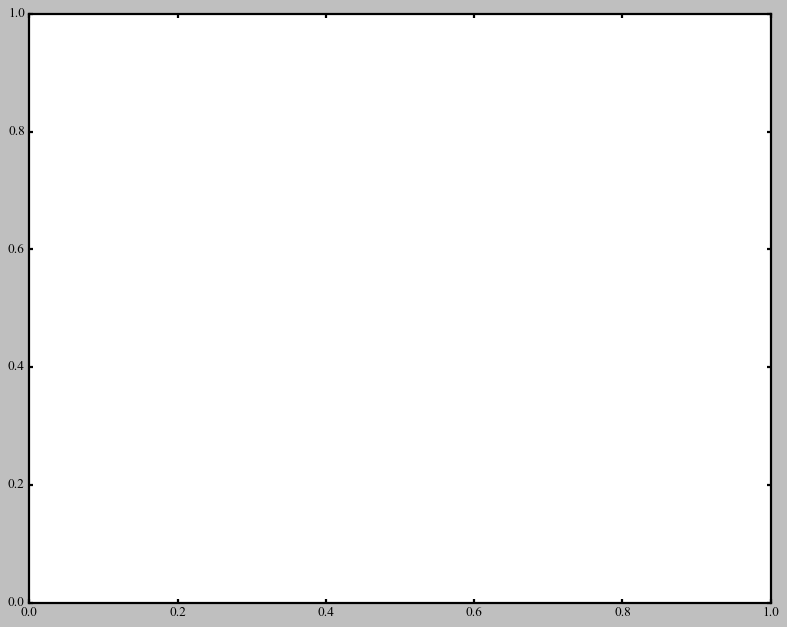

In [80]:
fig, ax = plt.subplots(tight_layout = True)

for i in range(5):
    ax.scatter(Scaled_T[i], Scaled_Chi[i], s = 300, marker = markers[i], facecolor = 'none',
              edgecolor = colors[i], linewidth = 2.0, label = label[i], zorder = 3)
    
ax.set_xlabel(r'$\epsilon L^{1/\nu}$', fontsize=35)
ax.set_ylabel(r'$\chi L^{-\gamma/\nu}$', fontsize=35)
ax.legend(scatterpoints = 1, frameon = False, fontsize = 25, loc = 'upper left')
ax.tick_params(direction='in', which = 'major', 
               labelsize = 30, length=12, width=2.)
ax.tick_params(direction='in', which = 'minor', 
               labelsize = 30, length=6, width=2.)
ax.xaxis.set_major_locator(MultipleLocator(10.))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.set_xlim(-10, 10)
ax.set_ylim(-0.01, 0.14)
plt.show()
plt.savefig('./figs/mag_collapse.png', format = 'png')